<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [VAE8] - Variational AutoEncoder (VAE) with CelebA - Analysis
<!-- DESC --> Episode 8 : Exploring latent space of our trained models
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - New data generation from **latent space**
 - Understanding of underlying principles
 - Guided image generation, **latent morphing**
 - Model management
 
Here again, we don't consume data anymore, but we generate them ! ;-)


The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) contains about 200,000 images (202599,218,178,3)...  
...But our data is now in the imagination of our network!

## What we're going to do :
 - Load a saved model
 - Reconstruct some images from latent space
 - Matrix of generated images

## Step 1 - Setup environment
### 1.1 - Python stuff

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from skimage import io, transform
import os,sys,importlib
import math
from importlib import reload

import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import norm

import modules.vae
import modules.data_generator

reload(modules.data_generator)
reload(modules.vae)

from modules.vae  import VariationalAutoencoder
from modules.data_generator import DataGenerator

sys.path.append('..')
import fidle.pwk as ooo
importlib.reload(ooo)

place, datasets_dir = ooo.init()

VariationalAutoencoder.about()
DataGenerator.about()


FIDLE 2020 - Practical Work Module
Version              : 0.57 DEV
Run time             : Sunday 13 September 2020, 20:13:39
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Current place        : Fidle at IDRIS
Datasets dir         : /gpfswork/rech/mlh/commun/datasets
Update keras cache   : Done

FIDLE 2020 - Variational AutoEncoder (VAE)
TensorFlow version   : 2.2.0
VAE version          : 1.28

FIDLE 2020 - DataGenerator
Version              : 0.4.1


### 1.2 - The good place

In [2]:
train_dir    = f'{datasets_dir}/celeba/clusters-m.train'
test_dir     = f'{datasets_dir}/celeba/clusters-m.test'

dataset_csv  = f'{datasets_dir}/celeba/origine/list_attr_celeba.csv'
dataset_img  = f'{datasets_dir}/celeba/origine/img_align_celeba'

## Step 2 - Get data

In [3]:
x_test       = np.load(f'{test_dir}/images-000.npy')
dataset_desc = pd.read_csv(dataset_csv, header=0)

(lx,ly,lz) = x_test[0].shape
image_size   = (lx,ly)
print(f'Images size : {image_size}')

Images size : (192, 160)


## Step 3 - Load best model

In [4]:
tag = 'CelebA.002-M.266176'

vae=modules.vae.VariationalAutoencoder.load(tag, config='vae_config.json', weights='best_model.h5')

Model initialized.
Outputs will be in  : ./run/CelebA.002-M.266176
Weights loaded from : ./run/CelebA.002-M.266176/models/best_model.h5


## Step 4 - Image reconstruction

In [5]:
# ---- Choose few points

n_show = 8

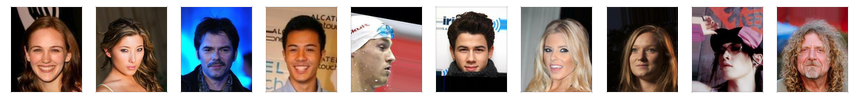

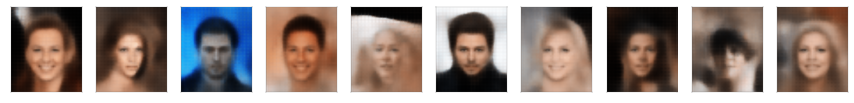

In [6]:
np.random.shuffle(x_test)

# ---- Get latent points and reconstructed images

z_test    = vae.encoder.predict(x_test)
x_reconst = vae.decoder.predict(z_test)

# ---- Just show it

ooo.plot_images(x_test[:10],    None, columns=10, x_size=1.5,y_size=1.5, spines_alpha=0.1)
ooo.plot_images(x_reconst[:10], None, columns=10, x_size=1.5,y_size=1.5, spines_alpha=0.1)


## Step 5 - Latent space

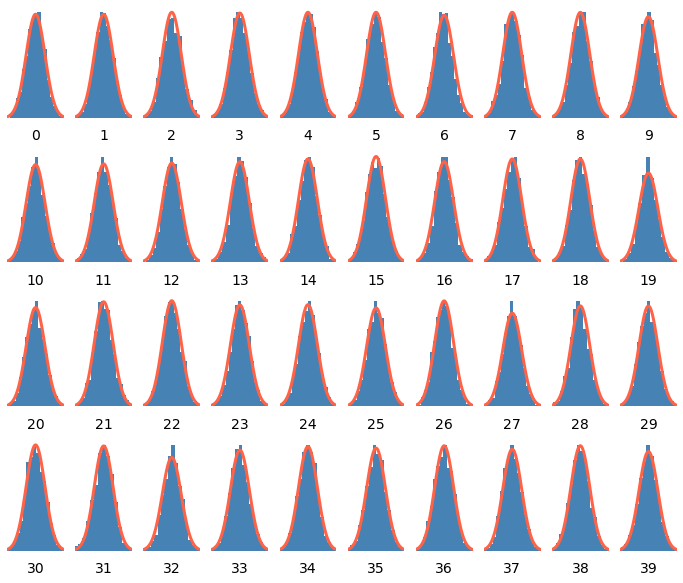

In [7]:
x = np.linspace(-3, 3, 100)

fig = plt.figure(figsize=(12, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

for i in range(40):
    ax = fig.add_subplot(4, 10, i+1)
    ax.hist(z_test[:,i], density=True, bins = 20)
    ax.axis('off')
    ax.set_xlim(-3,3)
    ax.text(0.5, -0.2, str(i), fontsize=14, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))

plt.show()

## Step 6 - Generating new faces

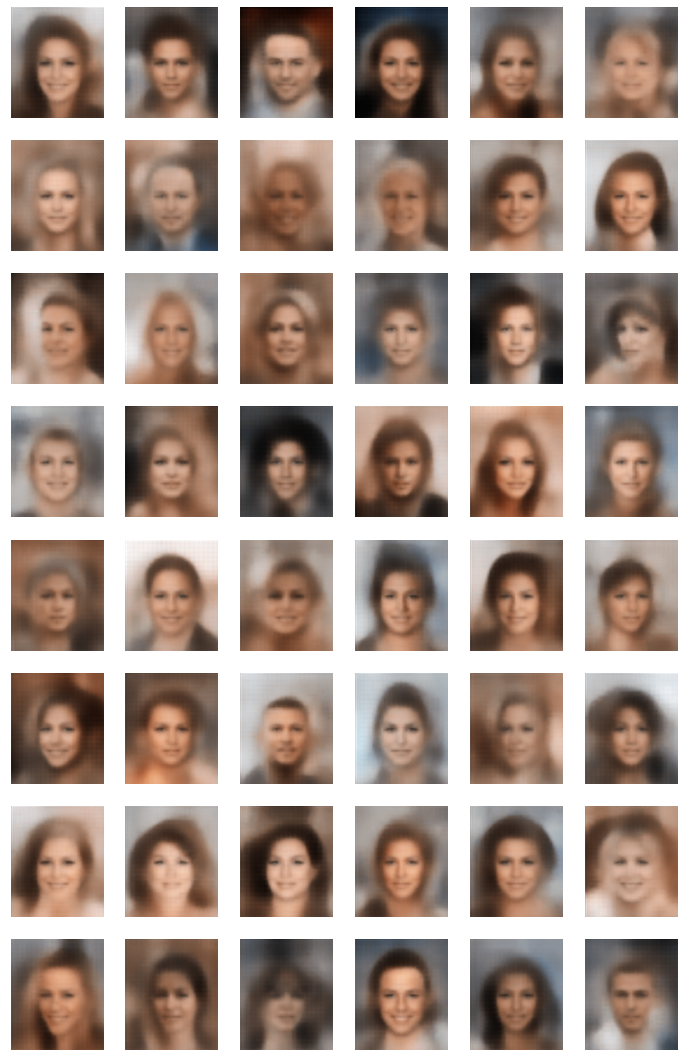

In [8]:
n_new = 48

z_new = np.random.normal( loc=0,scale=0.7,size=(n_new,vae.z_dim) )
x_new = vae.decoder.predict(z_new)

ooo.plot_images(x_new, None, columns=6, x_size=2,y_size=2.4, spines_alpha=0,y_padding=0)

## Step 7 - Playing with latent space
### 7.1 - The attributes of our images

In [9]:
display(dataset_desc.head())
for i,v in enumerate(dataset_desc.columns):
    print(f'{v:24}', end='')
    if (i+1) % 4 == 0 :print('')

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


image_id                5_o_Clock_Shadow        Arched_Eyebrows         Attractive              
Bags_Under_Eyes         Bald                    Bangs                   Big_Lips                
Big_Nose                Black_Hair              Blond_Hair              Blurry                  
Brown_Hair              Bushy_Eyebrows          Chubby                  Double_Chin             
Eyeglasses              Goatee                  Gray_Hair               Heavy_Makeup            
High_Cheekbones         Male                    Mouth_Slightly_Open     Mustache                
Narrow_Eyes             No_Beard                Oval_Face               Pale_Skin               
Pointy_Nose             Receding_Hairline       Rosy_Cheeks             Sideburns               
Smiling                 Straight_Hair           Wavy_Hair               Wearing_Earrings        
Wearing_Hat             Wearing_Lipstick        Wearing_Necklace        Wearing_Necktie         
Young                   

### 7.2 Let's find some predictable images

In [10]:
def get_latent_vector(images_desc):

    # ---- Get filenames of fex images
    
    filenames=images_desc['image_id'][:50]
    
    # ---- Retrieve images
    
    imgs=[]
    for i,filename in enumerate(filenames):
        filename = f'{dataset_img}/{filename}'
        img = io.imread(filename)
        img = transform.resize(img, image_size)
        imgs.append( img )
        ooo.update_progress('Read :',len(imgs),len(filenames))
        
    # ---- Get latent space vectors

    x_images=np.array(imgs)
    z_images  = vae.encoder.predict(x_images)
    
    # ---- return mean vector
    
    return z_images.mean(axis=0)

Read :           [########################################] 100.0% of 50
Read :           [########################################] 100.0% of 50
Read :           [########################################] 100.0% of 50


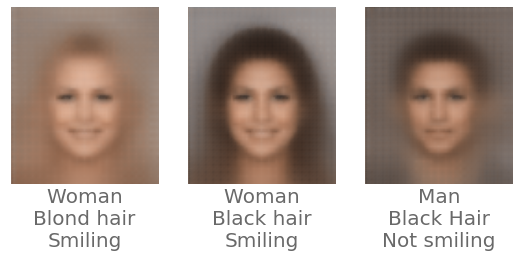

In [11]:
df = dataset_desc

z11 = get_latent_vector( df.loc[ (df['Male'] == -1)  & (df['Smiling']== 1) & (df['Blond_Hair']== 1)] )
z12 = get_latent_vector( df.loc[ (df['Male'] == -1)  & (df['Smiling']== 1) & (df['Black_Hair']== 1)] )
z21 = get_latent_vector( df.loc[ (df['Male'] ==  1)  & (df['Smiling']==-1) & (df['Black_Hair']== 1)] )

labels=['Woman\nBlond hair\nSmiling','Woman\nBlack hair\nSmiling','Man\nBlack Hair\nNot smiling']


z_images = np.array( [z11,z12,z21] )
x_images = vae.decoder.predict( z_images )
ooo.plot_images(x_images,labels,columns=3,x_size=3,y_size=3,spines_alpha=0)

### 7.3 - And do somme latent morphing !

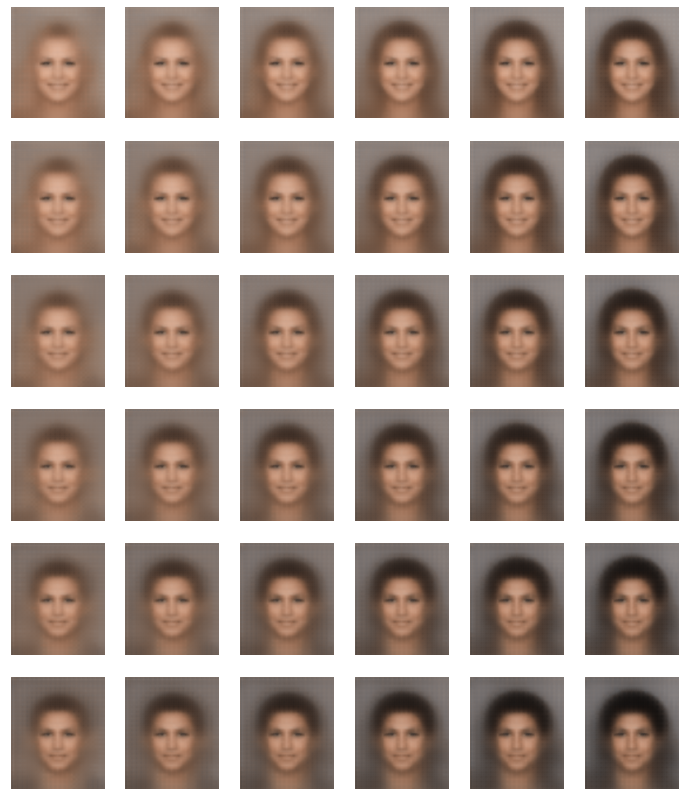

In [12]:

n=6
dj=(z12-z11)/n
di=(z21-z11)/n

z_images=[]
for i in range(n):
    for j in range(n):
        z_images.append( z11+di*i+dj*j )
#         z_images.append( z11+di*i+dj*j  + 0.5*np.random.normal(.2,.3,200))

x_images = vae.decoder.predict( np.array(z_images) )
ooo.plot_images(x_images,columns=n,x_size=2,y_size=2.4,y_padding=0,spines_alpha=0)

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>